In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Input,Normalization
from eval_class import *
from keras.callbacks import EarlyStopping
from keras import regularizers

In [2]:
Predict_price_train = pd.read_csv(r'Predict_price_train.csv')
Predict_price_valid = pd.read_csv(r'Predict_price_valid.csv')

In [3]:
df = pd.read_csv(r'C:\Users\Sharif\Downloads\feature-rasad-target1 (2).csv')
df=df.drop(['Unnamed: 0'],axis=1)
pca = pd.read_csv(r'C:\Users\Sharif\Downloads\data_main2(1).csv')

In [4]:
df

,Date,Open,High,Low,Close,v_i_buy,v_n_buy,v_i_sell,v_n_sell,n_i_buy,n_n_buy,n_i_sell,n_n_sell,f1,f2,f3,f4,f5,f6,EMA_10,EMA_30,ATR,ADX,RSI,MACD,MACD_signal,Close_EMA_10,EMA_10_EMA_30,MACD_Signal_MACD,return,target,RSI_Signal
0,20110711,12500,12500,12500,12500,30320681.0,89389319.0,0.0,119710000.0,5736.0,166.0,0.0,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,NaN,1,0
1,20110712,12610,12940,12511,12513,839652.0,2603130.0,3327282.0,115500.0,237.0,9.0,1153.0,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.002885,0,0
2,20110713,12515,12685,12501,12502,305908.0,6485132.0,6324540.0,466500.0,49.0,9.0,986.0,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-0.002440,0,0
3,20110719,12629,12629,12500,12501,98549.0,1580602.0,1578151.0,101000.0,26.0,3.0,261.0,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-0.000222,0,0
4,20110720,12501,12515,12500,12500,104577.0,2076431.0,1822008.0,359000.0,10.0,2.0,303.0,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-0.000222,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,20230710,142600,143300,138000,140000,391689.0,118067.0,474867.0,34889.0,469.0,4.0,250.0,2.0,0.119317,0.296359,1.000000,0.974968,0.093904,-0.226698,0.408562,0.437398,0.011572,27.755733,34.996847,-0.020761,-0.023017,-1,-1,-1,-0.019505,0,0
2637,20230711,139000,139000,133300,133650,377747.0,20807.0,398354.0,200.0,347.0,3.0,242.0,1.0,0.182436,0.291115,1.000000,1.027145,0.005133,-3.953175,0.403233,0.433647,0.011464,28.330664,30.024964,-0.021749,-0.022763,-1,-1,-1,-0.049302,0,0
2638,20230712,133550,138950,129200,133400,441901.0,50931.0,435832.0,57000.0,540.0,2.0,319.0,2.0,0.302494,0.450181,0.999717,1.064989,0.221131,-6.809376,0.398735,0.430089,0.011285,29.278364,29.845194,-0.022335,-0.022677,-1,-1,-1,-0.001992,0,-1
2639,20230715,133800,138900,133650,136450,507663.0,21897.0,344784.0,184776.0,449.0,3.0,343.0,3.0,0.343409,0.508836,0.992386,1.058249,-0.007614,-7.833776,0.396730,0.427354,0.011746,30.158370,34.961427,-0.021805,-0.022503,-1,-1,-1,0.024031,0,0


In [5]:
pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,date,Close
0,8.034553e+05,-116928.643640,153367.769215,61180.329866,-533.018701,-345.385603,2126.086181,-44.063518,-10.363875,-3.490201,-3.641695,-0.833951,4.204275,-2.516574,-0.135558,20120610,12000
1,-7.496663e+05,10355.990718,5710.280402,15889.769461,-123.101821,-29.614464,-668.830372,-27.391712,0.608751,-0.390075,2.997668,-0.264243,4.188584,-3.280048,-0.448807,20120714,11390
2,-2.816963e+05,-423108.571216,-62169.873081,59737.415945,3470.120139,-439.797580,1807.934082,-24.327617,-12.872542,4.088564,-1.850089,0.217305,0.624123,-4.384927,-0.647308,20120722,10150
3,7.472541e+05,-235511.061248,-57714.396507,47894.941007,4584.540215,-406.263772,758.790007,-45.894674,-8.455026,3.333220,-5.452699,0.465177,0.150495,-2.216129,1.087821,20120723,10799
4,-5.810090e+05,329289.835162,-35980.382017,49383.170571,1447.008824,-252.349664,1031.497917,-34.854055,-5.463971,1.263067,0.858669,-1.813554,0.653703,-5.178204,-0.399496,20120724,10701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-9.033843e+05,-978941.060823,59572.962222,-9250.593101,-2648.261668,-124.593469,998.546516,446.792964,-25.633822,-2.869416,-1.643769,-0.520154,0.678705,1.723787,-0.764789,20230610,154950
1508,-1.611956e+06,-640930.081962,2988.013612,-2753.561370,-3179.352797,31.562840,38.435055,-21.030952,-27.019773,-0.981566,-1.320975,0.094992,-1.205429,1.026250,-0.099406,20230611,152950
1509,-5.222906e+05,-500017.588834,-35597.670587,-13607.657076,-143.291285,-422.980286,2904.351400,-39.583968,-30.522106,-0.466694,-0.552104,-1.133779,0.493897,1.942851,-0.062873,20230612,146050
1510,-2.604537e+05,66112.796014,-76081.998276,3839.756298,-3065.714595,-24.441763,436.768348,-24.112073,-31.389450,-0.086056,-0.684275,-0.225807,0.704404,0.998876,-0.219016,20230613,146300


In [6]:
pca= pca.merge(df, left_on='date', right_on='Date')

In [7]:
pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,date,Close_x,Date,Open,High,Low,Close_y,v_i_buy,v_n_buy,v_i_sell,v_n_sell,n_i_buy,n_n_buy,n_i_sell,n_n_sell,f1,f2,f3,f4,f5,f6,EMA_10,EMA_30,ATR,ADX,RSI,MACD,MACD_signal,Close_EMA_10,EMA_10_EMA_30,MACD_Signal_MACD,return,target,RSI_Signal
0,8.034553e+05,-116928.643640,153367.769215,61180.329866,-533.018701,-345.385603,2126.086181,-44.063518,-10.363875,-3.490201,-3.641695,-0.833951,4.204275,-2.516574,-0.135558,20120610,12000,20120610,11508,12077,11508,12000,7521.0,526500.0,135259.0,398762.0,7.0,2.0,25.0,3.0,0.130788,0.235277,0.254522,0.240068,0.060869,-6.088673,0.012094,0.013492,0.000817,30.660139,42.397094,-0.001040,-0.001053,-1,-1,-1,0.105361,0,0
1,-7.496663e+05,10355.990718,5710.280402,15889.769461,-123.101821,-29.614464,-668.830372,-27.391712,0.608751,-0.390075,2.997668,-0.264243,4.188584,-3.280048,-0.448807,20120714,11390,20120714,11579,11579,11151,11390,23167.0,156000.0,58574.0,120593.0,7.0,2.0,19.0,2.0,0.302319,0.272291,1.000000,0.964686,0.089127,3.513850,0.008395,0.009361,0.001217,34.678255,54.038724,-0.000713,-0.001234,1,-1,-1,0.105033,0,0
2,-2.816963e+05,-423108.571216,-62169.873081,59737.415945,3470.120139,-439.797580,1807.934082,-24.327617,-12.872542,4.088564,-1.850089,0.217305,0.624123,-4.384927,-0.647308,20120722,10150,20120722,10396,10400,10051,10150,47322.0,104752.0,140705.0,11369.0,14.0,2.0,19.0,2.0,0.334809,0.493551,0.999681,1.008728,-0.000319,-4.696763,0.007668,0.008843,0.001215,30.559490,41.873304,-0.000818,-0.000955,-1,-1,-1,-0.067006,0,0
3,7.472541e+05,-235511.061248,-57714.396507,47894.941007,4584.540215,-406.263772,758.790007,-45.894674,-8.455026,3.333220,-5.452699,0.465177,0.150495,-2.216129,1.087821,20120723,10799,20120723,10388,10890,10388,10799,151216.0,282355.0,343571.0,90000.0,29.0,4.0,44.0,2.0,0.219389,0.413639,1.000000,1.009488,0.007746,-6.355936,0.007810,0.008817,0.001235,28.990915,49.397290,-0.000701,-0.000904,1,-1,-1,0.263794,0,0
4,-5.810090e+05,329289.835162,-35980.382017,49383.170571,1447.008824,-252.349664,1031.497917,-34.854055,-5.463971,1.263067,0.858669,-1.813554,0.653703,-5.178204,-0.399496,20120724,10701,20120724,10801,10956,10503,10701,16976.0,115097.0,118573.0,13500.0,6.0,2.0,22.0,1.0,0.221280,0.439413,0.961042,1.040233,-0.038958,0.170306,0.007872,0.008774,0.001173,27.419529,48.378945,-0.000625,-0.000848,1,-1,-1,-0.035640,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-9.033843e+05,-978941.060823,59572.962222,-9250.593101,-2648.261668,-124.593469,998.546516,446.792964,-25.633822,-2.869416,-1.643769,-0.520154,0.678705,1.723787,-0.764789,20230610,154950,20230610,163450,163450,154950,154950,254722.0,478000.0,400685.0,332037.0,582.0,4.0,187.0,3.0,0.445613,0.489516,0.975648,0.879090,0.249219,-8.661301,0.484848,0.516023,0.013731,21.583799,25.963645,-0.023126,-0.015602,-1,-1,1,-0.049454,0,-1
1508,-1.611956e+06,-640930.081962,2988.013612,-2753.561370,-3179.352797,31.562840,38.435055,-21.030952,-27.019773,-0.981566,-1.320975,0.094992,-1.205429,1.026250,-0.099406,20230611,152950,20230611,150000,157950,149000,152950,309129.0,273545.0,469459.0,113215.0,458.0,5.0,552.0,2.0,0.562187,0.572593,0.478911,0.894507,-0.521089,-8.587677,0.476240,0.510958,0.012827,23.437571,24.939356,-0.025623,-0.017606,-1,-1,1,-0.013704,0,-1
1509,-5.222906e+05,-500017.588834,-35597.670587,-13607.657076,-143.291285,-422.980286,2904.351400,-39.583968,-30.522106,-0.466694,-0.552104,-1.133779,0.493897,1.942851,-0.062873,20230612,146050,20230612,152050,155000,146050,146050,466472.0,185341.0,421166.0,230647.0,794.0,5.0,83.0,3.0,0.679242,0.698577,0.227455,0.811151,-0.717445,-8.698489,0.465411,0.504875,0.012067,25.373302,21.751171,-0.028949,-0.019875,-1,-1,1,-0.048773,0,-1
1510,-2.604537e+05,66112.796014,-76081.998276,3839.756298,-3065.714595,-24.441763,436.768348,-24.112073,-31.389450,-0.086056,-0.684275,-0.225807,0.704404,0.998876,-0.

In [8]:
train=pca[:1058]
validation=pca[10588:]

In [10]:
train['return1'] = np.log(train['Close_x'].shift(-10)/train['Close_x'])
a=np.log(train['Close_x'].shift(-10)/train['Close_x'])
a.describe()

C:\Users\Sharif\AppData\Local\Temp\ipykernel_5896\1460141690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['return1'] = np.log(train['Close_x'].shift(-10)/train['Close_x'])


count    1048.000000
mean        0.027598
std         0.151287
min        -0.368651
25%        -0.043846
50%         0.023607
75%         0.084445
max         1.055440
Name: Close_x, dtype: float64

In [11]:
train['target1'] = np.where((train['return1'] <-0.06) , 1, np.where(train['return1'] >   0.06, -1, 0))

C:\Users\Sharif\AppData\Local\Temp\ipykernel_5896\3157014742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target1'] = np.where((train['return1'] <-0.06) , 1, np.where(train['return1'] >   0.06, -1, 0))


In [12]:
datas={
    "signal":train.target1.tolist(),
    "close":train.Close_x.tolist() 
}
y1=pd.DataFrame(datas)
profit, win_rate = eval_strategy(y1)
print("profit:", profit,"\nwin_rate:", win_rate)

profit: 649.554 
win_rate: 0.913


In [13]:
L=[-1]
for i in range(len(train)-2):
    L.append(0)
L.append(1)

datas={
    "signal":L,
    "close":train.Close_x.tolist() 
}
y1=pd.DataFrame(datas)
profit, win_rate = eval_strategy(y1)
print("profit:", profit,"\nwin_rate:", win_rate)

profit: 15.5342 
win_rate: 1.0


In [43]:
a = train[['Date','Close_x','0', '1','2', '3', '4', '5', '6','7', '8', '9', '10', '11','12','13','14','target1','ATR', 'ADX','RSI', 'RSI_Signal', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD']]
a = a.dropna()
x_train = a[['Date','Close_x','0', '1','2', '3', '4', '5', '6','7', '8', '9', '10', '11','12','13','14','ATR', 'ADX','RSI', 'RSI_Signal', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD']]
y_train = a['target1']

In [27]:
validation['return1'] = np.log(validation['Close_x'].shift(-10)/validation['Close_x'])
validation['target1'] = np.where((validation['return1'] < -0.06) , 1, np.where(validation['return1'] >  0.06, -1, 0))

C:\Users\Sharif\AppData\Local\Temp\ipykernel_5896\598013292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['return1'] = np.log(validation['Close_x'].shift(-10)/validation['Close_x'])
C:\Users\Sharif\AppData\Local\Temp\ipykernel_5896\598013292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['target1'] = np.where((validation['return1'] < -0.06) , 1, np.where(validation['return1'] >  0.06, -1, 0))


In [26]:
validation=pca[1058:]
validation

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,date,Close_x,Date,Open,High,Low,Close_y,v_i_buy,v_n_buy,v_i_sell,v_n_sell,n_i_buy,n_n_buy,n_i_sell,n_n_sell,f1,f2,f3,f4,f5,f6,EMA_10,EMA_30,ATR,ADX,RSI,MACD,MACD_signal,Close_EMA_10,EMA_10_EMA_30,MACD_Signal_MACD,return,target,RSI_Signal
1058,-7.886185e+06,-5.057550e+06,230242.744149,-307961.407809,-1871.249033,-99.763642,302.879269,-18.818130,6.298510,-5.064492,6.035845,0.673909,2.651470,1.720935,0.816411,20210306,187489,20210306,186000,188500,183812,187489,421917.0,62295.0,191328.0,292884.0,459.0,3.0,407.0,1.0,0.240959,0.328751,0.995710,0.931925,-0.004290,4.313209,0.533473,0.543328,0.015271,9.038941,49.886361,-0.007338,-0.008124,1,-1,-1,0.005189,0,0
1059,-3.024126e+06,-3.311615e+06,-26811.180217,-38509.835516,-1866.421124,29.241210,-809.187489,-23.726417,9.710218,0.448826,5.673683,1.947640,2.459634,2.611361,0.791202,20210307,196373,20210307,185380,196373,185380,196373,1080872.0,37752.0,570278.0,548346.0,650.0,6.0,821.0,10.0,0.249232,0.446633,1.000000,0.968287,0.059474,6.526396,0.539854,0.544957,0.015433,10.305807,56.927783,-0.004065,-0.007312,1,-1,-1,0.048310,0,0
1060,-3.060310e+06,-9.309814e+05,44845.042548,18743.470127,-2805.552635,96.759298,-362.965359,-13.265457,14.463339,-0.450772,4.881519,0.209764,2.931325,0.810980,-0.235295,20210308,204950,20210308,198836,204980,197001,204950,573369.0,148119.0,662262.0,59226.0,736.0,2.0,812.0,3.0,0.398180,0.544223,1.000000,0.985395,0.000000,7.707662,0.549782,0.548151,0.016284,12.270741,62.418070,0.000612,-0.005727,1,1,-1,0.044526,0,0
1061,5.315437e+05,-1.583153e+06,35837.663010,61278.358249,-3108.050668,-15.576101,-241.441466,-27.992649,9.468191,-2.567775,6.467719,-0.068272,2.137580,2.270962,-0.288522,20210309,200100,20210309,206530,209212,198051,200100,688977.0,835908.0,1120566.0,404319.0,667.0,5.0,832.0,5.0,0.586848,0.734363,0.930543,0.989369,-0.065167,8.331355,0.555243,0.550194,0.015462,14.423708,57.922006,0.003101,-0.003961,1,1,-1,-0.024934,0,0
1062,-2.034207e+06,8.966341e+05,-1707.588639,18275.238541,-3007.186229,123.682447,-301.990240,-13.729953,6.897668,0.499335,3.959664,-0.347334,2.801914,1.259782,-0.053327,20210310,200030,20210310,201959,208500,199972,200030,381097.0,225880.0,527672.0,79305.0,369.0,6.0,616.0,6.0,0.695238,0.855845,0.878107,0.994663,-0.121893,5.765487,0.559673,0.552091,0.016177,16.422892,57.857229,0.004999,-0.002169,1,1,-1,-0.000364,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-9.033843e+05,-9.789411e+05,59572.962222,-9250.593101,-2648.261668,-124.593469,998.546516,446.792964,-25.633822,-2.869416,-1.643769,-0.520154,0.678705,1.723787,-0.764789,20230610,154950,20230610,163450,163450,154950,154950,254722.0,478000.0,400685.0,332037.0,582.0,4.0,187.0,3.0,0.445613,0.489516,0.975648,0.879090,0.249219,-8.661301,0.484848,0.516023,0.013731,21.583799,25.963645,-0.023126,-0.015602,-1,-1,1,-0.049454,0,-1
1508,-1.611956e+06,-6.409301e+05,2988.013612,-2753.561370,-3179.352797,31.562840,38.435055,-21.030952,-27.019773,-0.981566,-1.320975,0.094992,-1.205429,1.026250,-0.099406,20230611,152950,20230611,150000,157950,149000,152950,309129.0,273545.0,469459.0,113215.0,458.0,5.0,552.0,2.0,0.562187,0.572593,0.478911,0.894507,-0.521089,-8.587677,0.476240,0.510958,0.012827,23.437571,24.939356,-0.025623,-0.017606,-1,-1,1,-0.013704,0,-1
1509,-5.222906e+05,-5.000176e+05,-35597.670587,-13607.657076,-143.291285,-422.980286,2904.351400,-39.583968,-30.522106,-0.466694,-0.552104,-1.133779,0.493897,1.942851,-0.062873,20230612,146050,20230612,152050,155000,146050,146050,466472.0,185341.0,421166.0,230647.0,794.0,5.0,83.0,3.0,0.679242,0.698577,0.227455,0.811151,-0.717445,-8.698489,0.465411,0.504875,0.012067,25.373302,21.751171,-0.028949,-0.019875,-1,-1,1,-0.048773,0,-1
1510,-2.604537e+05,6.611280e+04,-76081.998276,3839.756298,-3065.714595,-24.441763,436.768348,-24.112073,-31.389450,-0.086056,-0.684275

In [23]:
b = validation[['Date','Close_x','0', '1','2', '3', '4', '5', '6','7', '8', '9', '10', '11','12','13','14','target1']]
b

,Date,Close_x,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target1


In [44]:
b = validation[['Date','Close_x','0', '1','2', '3', '4', '5', '6','7', '8', '9', '10', '11','12','13','14','target1','ATR', 'ADX','RSI', 'RSI_Signal', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD']]
b = b.dropna()
x_valid = b[['Date','Close_x','0', '1','2', '3', '4', '5', '6','7', '8', '9', '10', '11','12','13','14','ATR', 'ADX','RSI', 'RSI_Signal', 'Close_EMA_10', 'EMA_10_EMA_30', 'MACD_Signal_MACD']]
y_valid = b['target1']

In [45]:
def model_selection(X1,Y):
    seed = 7
    models = []
    models.append(('LogisticRegression', LogisticRegression(random_state=seed)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNeighborsClassifier', KNeighborsClassifier()))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
    models.append(('GaussianNB', GaussianNB()))
    models.append(('RandomForestClassifier', RandomForestClassifier()))
    models.append(('ExtraTreesClassifier',ExtraTreesClassifier(random_state=seed)))
    models.append(('AdaBoostClassifier',AdaBoostClassifier(DecisionTreeClassifier(random_state=seed),random_state=seed,learning_rate=0.01)))
    models.append(('SVM',svm.SVC(random_state=seed)))
    models.append(('GradientBoostingClassifier',GradientBoostingClassifier(random_state=seed)))
    models.append(('MLPClassifier',MLPClassifier(random_state=seed)))
    # evaluate each model in turn
    results = []
    names = []
    output = pd.DataFrame() 
    output = X1.reset_index(drop=True)
    output['Target'] = Y.reset_index(drop=True)
    output1 = pd.DataFrame() 
    output1 = x_valid.reset_index(drop=True)
    output1['Target'] = y_valid.reset_index(drop=True)
    #output2 = pd.DataFrame() 
   # output2 = x_test.reset_index(drop=True)
    #output2['Target'] = y_test.reset_index(drop=True)
    scoring = 'accuracy'
    scores = []
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed) 
        cv_results = cross_val_score(model, X1, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        model = model.fit(X1,Y)
        output[name] = model.predict(X1)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        score = model.score(x_valid, y_valid)
        scores.append(score)
        output1[name] = model.predict(x_valid) 
       # output2[name] = model.predict(x_test)
        msg1 = "%s: %f" % (name, score)
        print(msg1)
    return results, names, output, scores, output1 

In [46]:
results, names, output, scores ,output1  = model_selection(x_train,y_train)

C:\Users\Sharif\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sharif\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

LogisticRegression: 0.448023 (0.028769)
LogisticRegression: 0.409692
LDA: 0.500000 (0.038353)
LDA: 0.337004
KNeighborsClassifier: 0.419587 (0.039117)
KNeighborsClassifier: 0.337004
DecisionTreeClassifier: 0.642686 (0.043320)
DecisionTreeClassifier: 0.253304
GaussianNB: 0.344007 (0.052822)
GaussianNB: 0.350220
RandomForestClassifier: 0.704142 (0.039027)
RandomForestClassifier: 0.314978
ExtraTreesClassifier: 0.747637 (0.018016)
ExtraTreesClassifier: 0.317181
AdaBoostClassifier: 0.650261 (0.046758)
AdaBoostClassifier: 0.253304
SVM: 0.447062 (0.035435)
SVM: 0.414097
GradientBoostingClassifier: 0.726783 (0.047439)
GradientBoostingClassifier: 0.365639
MLPClassifier: 0.341285 (0.049302)
MLPClassifier: 0.273128


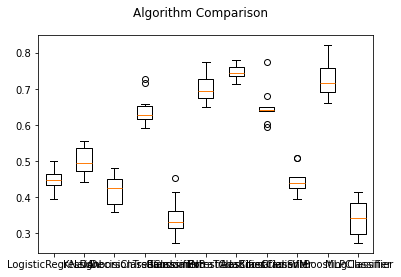

In [47]:
def plot_models(results, names):
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
plot_models(results, names)

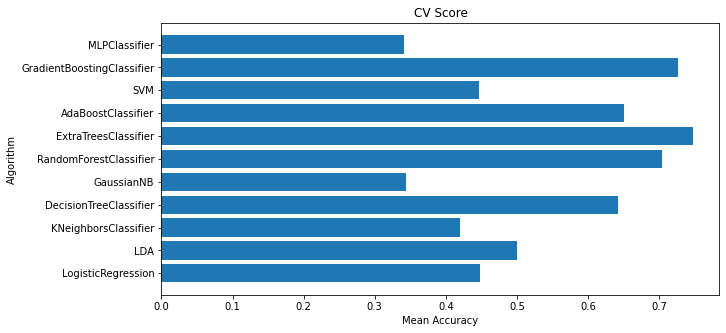

In [48]:
means = np.array(results).mean(axis=1)
fig = plt.figure(figsize=(10, 5))
# creating the bar plot
plt.barh(names,means)
plt.xlabel("Mean Accuracy")
plt.ylabel("Algorithm")
plt.title("CV Score")
plt.show()

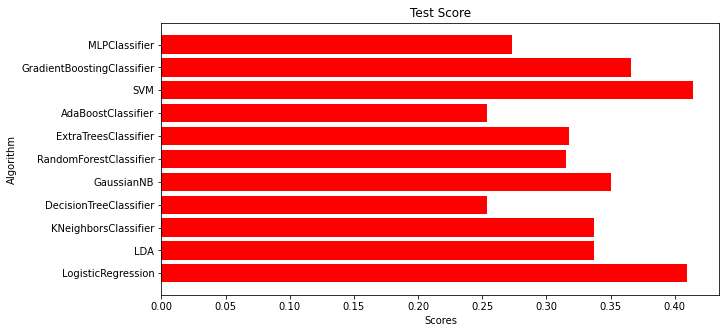

In [49]:
fig = plt.figure(figsize=(10, 5))
# creating the bar plot
plt.barh(names,scores,color='r')
plt.xlabel("Scores")
plt.ylabel("Algorithm")
plt.title("Test Score")
plt.show()

In [50]:
#LogisticRegression 	LMz6XaxP7FaH5uUuJbRyeEuQ2XGadC84Cu 	KNeighborsClassifier 	DecisionTreeClassifier 	GaussianNB 	RandomForestClassifier 	ExtraTreesClassifier 	AdaBoostClassifier 	SVM 	GradientBoostingClassifier 	MLPClassifier
out_puts=output.copy()

datas={
    "signal":out_puts.LDA.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_LDA=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_LDA)):
    if a == 1 and sample_eval_LDA.signal[i] == 1 or a == -1 and sample_eval_LDA.signal[i] == -1:
        sample_eval_LDA.signal[i] = 0
    elif a == -1 and sample_eval_LDA.signal[i] == 1 or a == 1 and sample_eval_LDA.signal[i] == -1:
        a = sample_eval_LDA.signal[i]
    elif a == 0 and sample_eval_LDA.signal[i] == -1:
        a = sample_eval_LDA.signal[i]
    elif a == 0 and sample_eval_LDA.signal[i] == 1:       
        sample_eval_LDA.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_LDA)
print("LDA","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.KNeighborsClassifier.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_KNN=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_KNN)):
    if a == 1 and sample_eval_KNN.signal[i] == 1 or a == -1 and sample_eval_KNN.signal[i] == -1:
        sample_eval_KNN.signal[i] = 0
    elif a == -1 and sample_eval_KNN.signal[i] == 1 or a == 1 and sample_eval_KNN.signal[i] == -1:
        a = sample_eval_KNN.signal[i]
    elif a == 0 and sample_eval_KNN.signal[i] == -1:
        a = sample_eval_KNN.signal[i]
    elif a == 0 and sample_eval_KNN.signal[i] == 1:       
        sample_eval_KNN.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_KNN)
print("KNN","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.DecisionTreeClassifier.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_Dtree=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_Dtree)):
    if a == 1 and sample_eval_Dtree.signal[i] == 1 or a == -1 and sample_eval_Dtree.signal[i] == -1:
        sample_eval_Dtree.signal[i] = 0
    elif a == -1 and sample_eval_Dtree.signal[i] == 1 or a == 1 and sample_eval_Dtree.signal[i] == -1:
        a = sample_eval_Dtree.signal[i]
    elif a == 0 and sample_eval_Dtree.signal[i] == -1:
        a = sample_eval_Dtree.signal[i]
    elif a == 0 and sample_eval_Dtree.signal[i] == 1:       
        sample_eval_Dtree.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_Dtree)
print("Dtree","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.GaussianNB.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_GausianNB=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_GausianNB)):
    if a == 1 and sample_eval_GausianNB.signal[i] == 1 or a == -1 and sample_eval_GausianNB.signal[i] == -1:
        sample_eval_GausianNB.signal[i] = 0
    elif a == -1 and sample_eval_GausianNB.signal[i] == 1 or a == 1 and sample_eval_GausianNB.signal[i] == -1:
        a = sample_eval_GausianNB.signal[i]
    elif a == 0 and sample_eval_GausianNB.signal[i] == -1:
        a = sample_eval_GausianNB.signal[i]
    elif a == 0 and sample_eval_GausianNB.signal[i] == 1:       
        sample_eval_GausianNB.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_GausianNB)
print("GausianNB","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.RandomForestClassifier.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_RF=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_RF)):
    if a == 1 and sample_eval_RF.signal[i] == 1 or a == -1 and sample_eval_RF.signal[i] == -1:
        sample_eval_RF.signal[i] = 0
    elif a == -1 and sample_eval_RF.signal[i] == 1 or a == 1 and sample_eval_RF.signal[i] == -1:
        a = sample_eval_RF.signal[i]
    elif a == 0 and sample_eval_RF.signal[i] == -1:
        a = sample_eval_RF.signal[i]
    elif a == 0 and sample_eval_RF.signal[i] == 1:       
        sample_eval_RF.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_RF)
print("RF","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.ExtraTreesClassifier.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_Etree=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_Etree)):
    if a == 1 and sample_eval_Etree.signal[i] == 1 or a == -1 and sample_eval_Etree.signal[i] == -1:
        sample_eval_Etree.signal[i] = 0
    elif a == -1 and sample_eval_Etree.signal[i] == 1 or a == 1 and sample_eval_Etree.signal[i] == -1:
        a = sample_eval_Etree.signal[i]
    elif a == 0 and sample_eval_Etree.signal[i] == -1:
        a = sample_eval_Etree.signal[i]
    elif a == 0 and sample_eval_Etree.signal[i] == 1:       
        sample_eval_Etree.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_Etree)
print("Etree","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.AdaBoostClassifier.tolist(),
    "close":out_puts.Close_x.tolist() 
}
sample_eval_AdaBoot=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_AdaBoot)):
    if a == 1 and sample_eval_AdaBoot.signal[i] == 1 or a == -1 and sample_eval_AdaBoot.signal[i] == -1:
        sample_eval_AdaBoot.signal[i] = 0
    elif a == -1 and sample_eval_AdaBoot.signal[i] == 1 or a == 1 and sample_eval_AdaBoot.signal[i] == -1:
        a = sample_eval_AdaBoot.signal[i]
    elif a == 0 and sample_eval_AdaBoot.signal[i] == -1:
        a = sample_eval_AdaBoot.signal[i]
    elif a == 0 and sample_eval_AdaBoot.signal[i] == 1:       
        sample_eval_AdaBoot.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_AdaBoot)
print("AdaBoot","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts.GradientBoostingClassifier.tolist(),
    "close":out_puts.Close_x.tolist(),
    "Date":out_puts.Date.tolist()
}
sample_eval_GBooting=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_GBooting)):
    if a == 1 and sample_eval_GBooting.signal[i] == 1 or a == -1 and sample_eval_GBooting.signal[i] == -1:
        sample_eval_GBooting.signal[i] = 0
    elif a == -1 and sample_eval_GBooting.signal[i] == 1 or a == 1 and sample_eval_GBooting.signal[i] == -1:
        a = sample_eval_GBooting.signal[i]
    elif a == 0 and sample_eval_GBooting.signal[i] == -1:
        a = sample_eval_GBooting.signal[i]
    elif a == 0 and sample_eval_GBooting.signal[i] == 1:       
        sample_eval_GBooting.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_GBooting)
print("GBooting","profit:", profit,"\nwin_rate:", win_rate)

LDA profit: 27.9121 
win_rate: 0.5185
KNN profit: 37.0614 
win_rate: 0.5849
Dtree profit: 649.554 
win_rate: 0.913
GausianNB profit: 3.9984 
win_rate: 0.5775
RF profit: 649.554 
win_rate: 0.913
Etree profit: 649.554 
win_rate: 0.913
AdaBoot profit: 649.554 
win_rate: 0.913
GBooting profit: 427.1314 
win_rate: 0.9524


In [51]:
out_puts1=output1.copy()

#LogisticRegression 	LMz6XaxP7FaH5uUuJbRyeEuQ2XGadC84Cu 	KNeighborsClassifier 	DecisionTreeClassifier 	GaussianNB 	RandomForestClassifier 	ExtraTreesClassifier 	AdaBoostClassifier 	SVM 	GradientBoostingClassifier 	MLPClassifier


datas={
    "signal":out_puts1.LDA.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_LDA=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_LDA)):
    if a == 1 and sample_eval_LDA.signal[i] == 1 or a == -1 and sample_eval_LDA.signal[i] == -1:
        sample_eval_LDA.signal[i] = 0
    elif a == -1 and sample_eval_LDA.signal[i] == 1 or a == 1 and sample_eval_LDA.signal[i] == -1:
        a = sample_eval_LDA.signal[i]
    elif a == 0 and sample_eval_LDA.signal[i] == -1:
        a = sample_eval_LDA.signal[i]
    elif a == 0 and sample_eval_LDA.signal[i] == 1:       
        sample_eval_LDA.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_LDA)
print("LDA","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.KNeighborsClassifier.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_KNN=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_KNN)):
    if a == 1 and sample_eval_KNN.signal[i] == 1 or a == -1 and sample_eval_KNN.signal[i] == -1:
        sample_eval_KNN.signal[i] = 0
    elif a == -1 and sample_eval_KNN.signal[i] == 1 or a == 1 and sample_eval_KNN.signal[i] == -1:
        a = sample_eval_KNN.signal[i]
    elif a == 0 and sample_eval_KNN.signal[i] == -1:
        a = sample_eval_KNN.signal[i]
    elif a == 0 and sample_eval_KNN.signal[i] == 1:       
        sample_eval_KNN.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_KNN)
print("KNN","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.DecisionTreeClassifier.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_Dtree=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_Dtree)):
    if a == 1 and sample_eval_Dtree.signal[i] == 1 or a == -1 and sample_eval_Dtree.signal[i] == -1:
        sample_eval_Dtree.signal[i] = 0
    elif a == -1 and sample_eval_Dtree.signal[i] == 1 or a == 1 and sample_eval_Dtree.signal[i] == -1:
        a = sample_eval_Dtree.signal[i]
    elif a == 0 and sample_eval_Dtree.signal[i] == -1:
        a = sample_eval_Dtree.signal[i]
    elif a == 0 and sample_eval_Dtree.signal[i] == 1:       
        sample_eval_Dtree.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_Dtree)
print("Dtree","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.GaussianNB.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_GausianNB=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_GausianNB)):
    if a == 1 and sample_eval_GausianNB.signal[i] == 1 or a == -1 and sample_eval_GausianNB.signal[i] == -1:
        sample_eval_GausianNB.signal[i] = 0
    elif a == -1 and sample_eval_GausianNB.signal[i] == 1 or a == 1 and sample_eval_GausianNB.signal[i] == -1:
        a = sample_eval_GausianNB.signal[i]
    elif a == 0 and sample_eval_GausianNB.signal[i] == -1:
        a = sample_eval_GausianNB.signal[i]
    elif a == 0 and sample_eval_GausianNB.signal[i] == 1:       
        sample_eval_GausianNB.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_GausianNB)
print("GausianNB","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.RandomForestClassifier.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_RF=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_RF)):
    if a == 1 and sample_eval_RF.signal[i] == 1 or a == -1 and sample_eval_RF.signal[i] == -1:
        sample_eval_RF.signal[i] = 0
    elif a == -1 and sample_eval_RF.signal[i] == 1 or a == 1 and sample_eval_RF.signal[i] == -1:
        a = sample_eval_RF.signal[i]
    elif a == 0 and sample_eval_RF.signal[i] == -1:
        a = sample_eval_RF.signal[i]
    elif a == 0 and sample_eval_RF.signal[i] == 1:       
        sample_eval_RF.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_RF)
print("RF","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.ExtraTreesClassifier.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_Etree=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_Etree)):
    if a == 1 and sample_eval_Etree.signal[i] == 1 or a == -1 and sample_eval_Etree.signal[i] == -1:
        sample_eval_Etree.signal[i] = 0
    elif a == -1 and sample_eval_Etree.signal[i] == 1 or a == 1 and sample_eval_Etree.signal[i] == -1:
        a = sample_eval_Etree.signal[i]
    elif a == 0 and sample_eval_Etree.signal[i] == -1:
        a = sample_eval_Etree.signal[i]
    elif a == 0 and sample_eval_Etree.signal[i] == 1:       
        sample_eval_Etree.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_Etree)
print("Etree","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.AdaBoostClassifier.tolist(),
    "close":out_puts1.Close_x.tolist() 
}
sample_eval_AdaBoot=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_AdaBoot)):
    if a == 1 and sample_eval_AdaBoot.signal[i] == 1 or a == -1 and sample_eval_AdaBoot.signal[i] == -1:
        sample_eval_AdaBoot.signal[i] = 0
    elif a == -1 and sample_eval_AdaBoot.signal[i] == 1 or a == 1 and sample_eval_AdaBoot.signal[i] == -1:
        a = sample_eval_AdaBoot.signal[i]
    elif a == 0 and sample_eval_AdaBoot.signal[i] == -1:
        a = sample_eval_AdaBoot.signal[i]
    elif a == 0 and sample_eval_AdaBoot.signal[i] == 1:       
        sample_eval_AdaBoot.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_AdaBoot)
print("AdaBoot","profit:", profit,"\nwin_rate:", win_rate)

datas={
    "signal":out_puts1.GradientBoostingClassifier.tolist(),
    "close":out_puts1.Close_x.tolist(),
    "Date":out_puts1.Date.tolist()
    
}
sample_eval_GBooting=pd.DataFrame(datas)
a=0
for i in range(len(sample_eval_GBooting)):
    if a == 1 and sample_eval_GBooting.signal[i] == 1 or a == -1 and sample_eval_GBooting.signal[i] == -1:
        sample_eval_GBooting.signal[i] = 0
    elif a == -1 and sample_eval_GBooting.signal[i] == 1 or a == 1 and sample_eval_GBooting.signal[i] == -1:
        a = sample_eval_GBooting.signal[i]
    elif a == 0 and sample_eval_GBooting.signal[i] == -1:
        a = sample_eval_GBooting.signal[i]
    elif a == 0 and sample_eval_GBooting.signal[i] == 1:       
        sample_eval_GBooting.signal[i] = 0
profit, win_rate = eval_strategy(sample_eval_GBooting)
print("GBooting","profit:", profit,"\nwin_rate:", win_rate)


LDA profit: 1.2331 
win_rate: 0.75
KNN profit: 0.6964 
win_rate: 0.4828
Dtree profit: 0.7059 
win_rate: 0.375
GausianNB profit: 1.3211 
win_rate: 0.7273
RF profit: 0.7431 
win_rate: 0.3333
Etree profit: 0.8626 
win_rate: 0.8
AdaBoot profit: 0.5544 
win_rate: 0.5385
GBooting profit: 1.6106 
win_rate: 0.8


In [36]:
L=[-1]
for i in range(len(validation)-2):
    L.append(0)
L.append(1)

datas={
    "signal":L,
    "close":validation.Close_x.tolist() 
}
y1=pd.DataFrame(datas)
profit, win_rate = eval_strategy(y1)
print("profit:", profit,"\nwin_rate:", win_rate)

profit: 0.7942 
win_rate: 0.0


In [52]:
import finplot as fplt
# CREATE A TICKER INSTANCE FOR TESLA
#Rasad = yf.Ticker('TSLA')

# RETRIEVE 1 YEAR WORTH OF DAILY DATA OF TESLA
#df = Rasad.history(interval='1d',period='1y')

# PLOT THE OHLC CANDLE CHART
aa=validation[['Open','Close_x','High','Low','Date']]
ab=sample_eval_GBooting
aa=ab.merge(aa, left_on='Date', right_on='Date')

fplt.candlestick_ochl(aa[['Open','Close_x','High','Low']])
#train1['AdaBoostClassifier']=sample_eval_AdaBoot['signal']
lo_wicks=sample_eval_GBooting['signal']
aa.loc[(lo_wicks==1),'marker'] = aa['Close_x']
fplt.plot(aa.index, aa['marker'],color='navy', style='^', legend='dumb mark')
aa.loc[(lo_wicks==-1),'marker1'] = aa['Close_x']
fplt.plot(aa.index, aa['marker1'],color='lawngreen', style='v', legend='dumb mark')

#fplt.plot(a , color='black', legend='Log price')
fplt.show()

 - Assuming time column is missing and using index instead.


In [38]:
validation

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,date,Close_x,Date,Open,High,Low,Close_y,v_i_buy,v_n_buy,v_i_sell,v_n_sell,n_i_buy,n_n_buy,n_i_sell,n_n_sell,f1,f2,f3,f4,f5,f6,EMA_10,EMA_30,ATR,ADX,RSI,MACD,MACD_signal,Close_EMA_10,EMA_10_EMA_30,MACD_Signal_MACD,return,target,RSI_Signal,return1,target1
1058,-7.886185e+06,-5.057550e+06,230242.744149,-307961.407809,-1871.249033,-99.763642,302.879269,-18.818130,6.298510,-5.064492,6.035845,0.673909,2.651470,1.720935,0.816411,20210306,187489,20210306,186000,188500,183812,187489,421917.0,62295.0,191328.0,292884.0,459.0,3.0,407.0,1.0,0.240959,0.328751,0.995710,0.931925,-0.004290,4.313209,0.533473,0.543328,0.015271,9.038941,49.886361,-0.007338,-0.008124,1,-1,-1,0.005189,0,0,0.173940,-1
1059,-3.024126e+06,-3.311615e+06,-26811.180217,-38509.835516,-1866.421124,29.241210,-809.187489,-23.726417,9.710218,0.448826,5.673683,1.947640,2.459634,2.611361,0.791202,20210307,196373,20210307,185380,196373,185380,196373,1080872.0,37752.0,570278.0,548346.0,650.0,6.0,821.0,10.0,0.249232,0.446633,1.000000,0.968287,0.059474,6.526396,0.539854,0.544957,0.015433,10.305807,56.927783,-0.004065,-0.007312,1,-1,-1,0.048310,0,0,0.108818,-1
1060,-3.060310e+06,-9.309814e+05,44845.042548,18743.470127,-2805.552635,96.759298,-362.965359,-13.265457,14.463339,-0.450772,4.881519,0.209764,2.931325,0.810980,-0.235295,20210308,204950,20210308,198836,204980,197001,204950,573369.0,148119.0,662262.0,59226.0,736.0,2.0,812.0,3.0,0.398180,0.544223,1.000000,0.985395,0.000000,7.707662,0.549782,0.548151,0.016284,12.270741,62.418070,0.000612,-0.005727,1,1,-1,0.044526,0,0,0.054640,0
1061,5.315437e+05,-1.583153e+06,35837.663010,61278.358249,-3108.050668,-15.576101,-241.441466,-27.992649,9.468191,-2.567775,6.467719,-0.068272,2.137580,2.270962,-0.288522,20210309,200100,20210309,206530,209212,198051,200100,688977.0,835908.0,1120566.0,404319.0,667.0,5.0,832.0,5.0,0.586848,0.734363,0.930543,0.989369,-0.065167,8.331355,0.555243,0.550194,0.015462,14.423708,57.922006,0.003101,-0.003961,1,1,-1,-0.024934,0,0,0.081080,-1
1062,-2.034207e+06,8.966341e+05,-1707.588639,18275.238541,-3007.186229,123.682447,-301.990240,-13.729953,6.897668,0.499335,3.959664,-0.347334,2.801914,1.259782,-0.053327,20210310,200030,20210310,201959,208500,199972,200030,381097.0,225880.0,527672.0,79305.0,369.0,6.0,616.0,6.0,0.695238,0.855845,0.878107,0.994663,-0.121893,5.765487,0.559673,0.552091,0.016177,16.422892,57.857229,0.004999,-0.002169,1,1,-1,-0.000364,0,0,0.054485,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-9.033843e+05,-9.789411e+05,59572.962222,-9250.593101,-2648.261668,-124.593469,998.546516,446.792964,-25.633822,-2.869416,-1.643769,-0.520154,0.678705,1.723787,-0.764789,20230610,154950,20230610,163450,163450,154950,154950,254722.0,478000.0,400685.0,332037.0,582.0,4.0,187.0,3.0,0.445613,0.489516,0.975648,0.879090,0.249219,-8.661301,0.484848,0.516023,0.013731,21.583799,25.963645,-0.023126,-0.015602,-1,-1,1,-0.049454,0,-1,NaN,0
1508,-1.611956e+06,-6.409301e+05,2988.013612,-2753.561370,-3179.352797,31.562840,38.435055,-21.030952,-27.019773,-0.981566,-1.320975,0.094992,-1.205429,1.026250,-0.099406,20230611,152950,20230611,150000,157950,149000,152950,309129.0,273545.0,469459.0,113215.0,458.0,5.0,552.0,2.0,0.562187,0.572593,0.478911,0.894507,-0.521089,-8.587677,0.476240,0.510958,0.012827,23.437571,24.939356,-0.025623,-0.017606,-1,-1,1,-0.013704,0,-1,NaN,0
1509,-5.222906e+05,-5.000176e+05,-35597.670587,-13607.657076,-143.291285,-422.980286,2904.351400,-39.583968,-30.522106,-0.466694,-0.552104,-1.133779,0.493897,1.942851,-0.062873,20230612,146050,20230612,152050,155000,146050,146050,466472.0,185341.0,421166.0,230647.0,794.0,5.0,83.0,3.0,0.679242,0.698577,0.227455,0.811151,-0.717445,-8.698489,0.465411,0.504875,0.012067,25.373302,21.751171,-0.028949,-0.019875,-1,-1,1,-0.048773,0,-1,NaN,0
1510,-2.604537e+05,6.611280e+04,-7